In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

Датасет выбран на тему прогнозирования прочности бетона на основании следующих данных:
1.   Cement - Цемент (компонент 1) - количественный - кг в смеси м3
2.   Blast Furnace Slag - Доменный шлак (компонент 2) - количественный - кг в смеси м3
3. Fly Ash - Зола-унос (компонент 3) - количественный - кг в смеси м3
4. Water - Вода (компонент 4) - количественный - кг в смеси м3
5. Superplasticize - уперпластификатор (компонент 5) - количественный - кг в смеси м3
6. Coarse Aggregate - Крупный заполнитель (компонент 6) - количественный - кг в смеси м3
7. Fine Aggregate - Мелкий заполнитель (компонент 7) - количественный - кг в смеси м3
8. Age - Возраст - количественный - Сутки (1~ 365)

In [ ]:
data = pd.read_excel("/content/data (1).xls")
data1 = data
data.head()

,Cement,Blast furnace slag,Fly ash,Water,Superpoastifier,Rough filler,Finely dispersed filler,Age,Concrete strength
0,213.50,0.0,174.24,159.21,11.66,1043.6,771.90,28,44.636676
1,212.07,0.0,121.62,180.31,5.69,1057.6,779.32,3,12.472621
2,318.00,0.0,126.00,210.00,6.00,861.0,737.00,28,40.058556
3,286.30,200.9,0.00,144.70,11.20,1004.6,803.70,3,24.400556
4,212.00,0.0,124.78,159.00,7.84,1085.4,799.54,3,19.519066


Получаем сводную статистику для числовых столбцов

In [ ]:
print(data.describe())
print(data.info())

           Cement  Blast furnace slag     Fly ash       Water  \
count  999.000000          999.000000  999.000000  999.000000   
mean   280.329229           74.018258   54.688609  181.431522   
std    104.800883           86.419513   64.115901   21.356675   
min    102.000000            0.000000    0.000000  121.750000   
25%    192.000000            0.000000    0.000000  164.900000   
50%    266.000000           22.000000    0.000000  185.000000   
75%    349.500000          142.650000  118.270000  192.000000   
max    540.000000          359.400000  200.000000  247.000000   

       Superpoastifier  Rough filler  Finely dispersed filler         Age  \
count       999.000000    999.000000               999.000000  999.000000   
mean          6.208123    973.077127               773.752653   45.483483   
std           5.962743     78.026117                80.189798   62.695861   
min           0.000000    801.000000               594.000000    1.000000   
25%           0.000000    932

Построим тепловую карту. На нем увидим, что наибольшую корреляцию с таргетом имеет столбец Water. Это понадобится нам для последнего пункта

<Axes: >

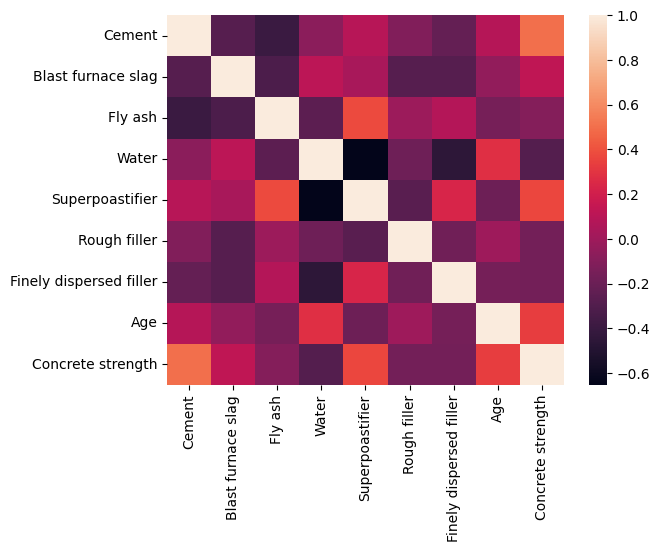

In [ ]:
sns.heatmap(data.corr())

Выберем в качестве таргета прочность бетона. Исключим из датасета.

In [ ]:
y = data.pop('Concrete strength')
df = data

Разделим на тест и трейн - 70/30

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.3, random_state=17, shuffle=True
)

Маштабируем

In [ ]:
scaler = MinMaxScaler()
df_scaled_train = scaler.fit_transform(X_train)
df_scaled_test = scaler.fit_transform(X_test)

Функция для расчёта нужных метрик

In [ ]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

In [ ]:
# Create a linear regression model
modelLR = LinearRegression()

# Fit the model to the data
modelLR.fit(df_scaled_train, y_train)

# Predict the response for a new data point
y_pr_LR = modelLR.predict(df_scaled_test)

_ = Reg_Models_Evaluation_Metrics(modelLR, df_scaled_train, y_train, df_scaled_test, y_test, y_pr_LR)

RMSE:  10.6347
  R2: 0.5805
 Adjusted R2: 0.569
 Cross Validated R2: 0.6023


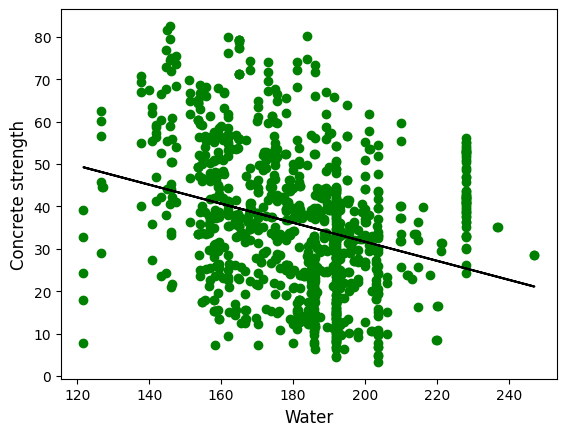

In [ ]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = data1['Water'].values[:,np.newaxis]

y2 = data1['Concrete strength'].values


model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Concrete strength', size=12)
plt.xlabel('Water', size=12)
plt.show()

Полиномиальная регрессия

In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features_train = poly.fit_transform(df_scaled_train)
poly_features_test = poly.fit_transform(df_scaled_test)

modelPR = LinearRegression()
modelPR.fit(poly_features_train, y_train)
y_pr_PR = modelPR.predict(poly_features_test)
_ = Reg_Models_Evaluation_Metrics(modelPR, poly_features_train, y_train, poly_features_test, y_test, y_pr_PR)

RMSE:  13.4447
  R2: 0.3295
 Adjusted R2: -0.485
 Cross Validated R2: 0.8159


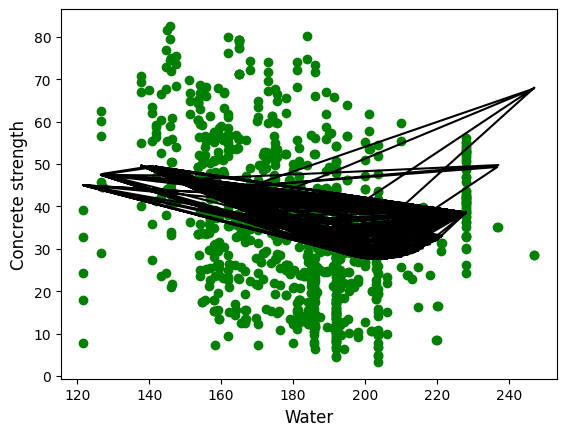

In [ ]:
X2 = data1['Water'].values[:,np.newaxis]
y2 = data1['Concrete strength'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)


plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Concrete strength', size=12)
plt.xlabel('Water', size=12)
plt.show()

Деревья принятия решений

In [ ]:
modelDT = DecisionTreeRegressor()
modelDT.fit(df_scaled_train, y_train)
y_dt_pred = modelDT.predict(df_scaled_test)
_ = Reg_Models_Evaluation_Metrics(modelDT, df_scaled_train, y_train, df_scaled_test, y_test, y_dt_pred)

RMSE:  8.0384
  R2: 0.7603
 Adjusted R2: 0.7537
 Cross Validated R2: 0.818


Случайный лес

In [ ]:
modelRF = RandomForestRegressor(n_estimators=100)
modelRF.fit(df_scaled_train, y_train)
y_rf_pred = modelRF.predict(df_scaled_test)
_ = Reg_Models_Evaluation_Metrics(modelRF, df_scaled_train, y_train, df_scaled_test, y_test, y_rf_pred)

RMSE:  5.7081
  R2: 0.8791
 Adjusted R2: 0.8758
 Cross Validated R2: 0.903


Регрессия опорных векторов (SVR)

In [ ]:
modelSVR = SVR(kernel='poly')
modelSVR.fit(df_scaled_train, y_train)
y_svr_pred = modelSVR.predict(df_scaled_test)
_ = Reg_Models_Evaluation_Metrics(modelSVR, df_scaled_train, y_train, df_scaled_test, y_test, y_svr_pred)

RMSE:  8.1872
  R2: 0.7514
 Adjusted R2: 0.7445
 Cross Validated R2: 0.7522


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


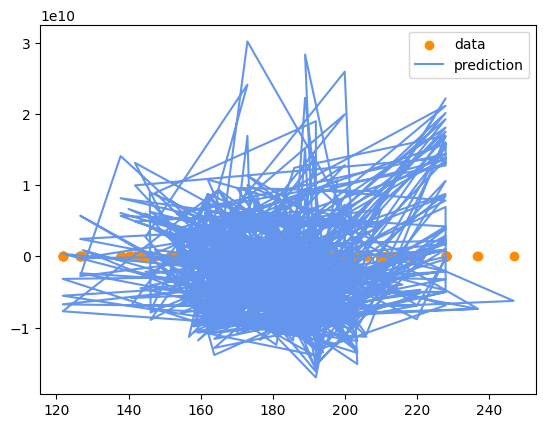

In [ ]:
plt.scatter(X_train["Water"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Water"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)
modelEN.fit(df_scaled_train, y_train)
y_en_pred = modelEN.predict(df_scaled_test)
_ = Reg_Models_Evaluation_Metrics(modelEN, df_scaled_train, y_train, df_scaled_test, y_test, y_en_pred)

RMSE:  11.7445
  R2: 0.4884
 Adjusted R2: 0.4743
 Cross Validated R2: 0.4995


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(


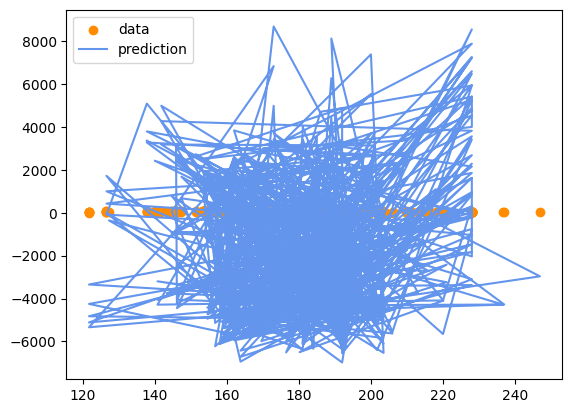

In [ ]:
plt.scatter(X_train["Water"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Water"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()